In [2]:
# Imports
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

In [3]:
# Methods
def show_cv2_image( bgr: np.ndarray ):
    plt.imshow( cv.cvtColor( bgr, cv.COLOR_BGR2RGB ) )

In [4]:
# Open images
sections_root = "./static/image/lecture_01"

sections_filenames = [
    "section1.webp",
    "section2.webp",
    "section3.webp",
    "section4.webp",
    "section5.webp",
    "section6_1.webp",
    "section6_2.webp",
    "section6_3.webp"
]

sections = [ cv.imread( f"{sections_root}/{filename}" ) for filename in sections_filenames ]

print( f"Successfully loaded {len(sections)} images." )

Successfully loaded 8 images.


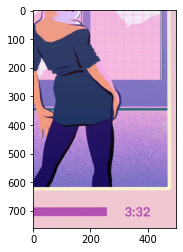

In [5]:
# Section 6
    # Recombine channels
section6 = sections[ 5 ] + sections[ 6 ] + sections[ 7 ]

plt.imshow( section6 )

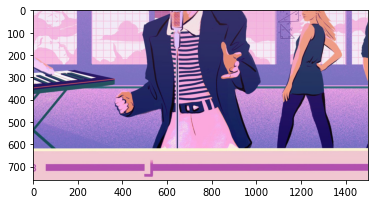

In [76]:
# Section 5
    # HSV back to BGR
section5 = cv.cvtColor( sections[ 4 ], cv.COLOR_HSV2BGR )

plt.imshow( section5 )

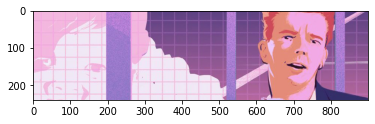

In [93]:
# Section 4
    # RGB to HSV
section4hsv = cv.cvtColor( sections[ 3 ], cv.COLOR_RGB2HSV ).astype( "int64", copy=False )

    # Undo shifts
section4hsv[ :, : ] -= [ 40, 50, -50 ]
section4hsv[ :, :, 0 ] %= 180          # Because OpenCV maps 0-360 to 0-179 instead of using the full 8-bit range

    # HSV back to BGR
section4flipped = cv.cvtColor( section4hsv.astype( "uint8", copy=False ), cv.COLOR_HSV2BGR )

    # Flip right side up
section4 = cv.flip( section4flipped, -1 )

plt.imshow( section4 )

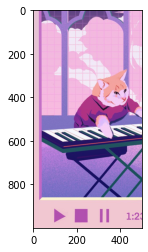

In [77]:
# Section 3
    # GBR to RGB
section3 = sections[ 2 ][ :, :, [ 2, 0, 1 ] ]

plt.imshow( section3 )

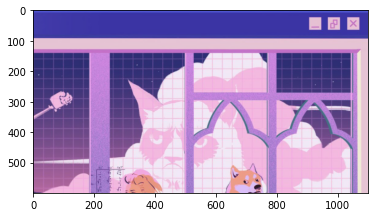

In [79]:
# Section 2
    # Stretch back
section2 = cv.resize( sections[ 1 ], dsize=( 1100, 600 ), interpolation=cv.INTER_AREA )

plt.imshow( section2 )

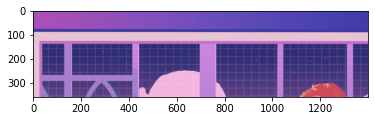

In [80]:
# Section 1
    # Scale back
section1 = cv.resize( sections[ 0 ], None, fx=1, fy=0.2 )

plt.imshow( section1 )

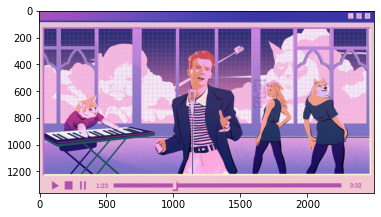

In [94]:
# Image
    # Reassemble
image = np.zeros( ( 1360, 2500, 3 ), dtype="uint8" )

image[ 0:360, 0:1400 ] = section1
image[ 0:600, 1400:2500 ] = section2
image[ 360:1360, 0:500 ] = section3
image[ 360:600, 500:1400 ] = section4
image[ 600:1360, 500:2000 ] = section5
image[ 600:1360, 2000:2500 ] = section6

plt.imshow( image )

In [98]:
# Save output
cv.imwrite( "lecture_01.webp", cv.cvtColor( image, cv.COLOR_RGB2BGR ), ( cv.IMWRITE_WEBP_QUALITY, 50 ) )

True